In [54]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [4]:
# getting mnist dataset from keras
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape
# here 28,28 is image size and 60000 images in training and in test data 10000 images
# all image size should be same, if not need to resize image using cv2.resize(image,(28,28))

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
X_train[0]
print(X_train[0].shape)

(28, 28)


5


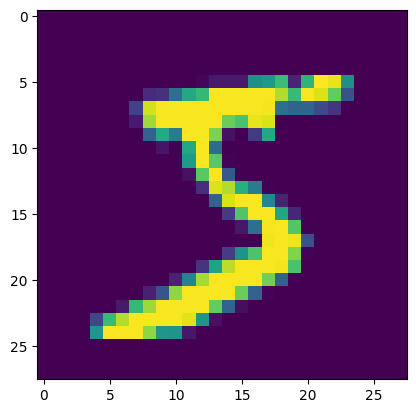

In [14]:
# lets check some of datapoints
plt.imshow(X_train[0])
print(Y_train[0])

In [15]:
## unique numbers present in dataset
print("unique in training",np.unique(Y_train))
print("unique in testing",np.unique(Y_test))

unique in training [0 1 2 3 4 5 6 7 8 9]
unique in testing [0 1 2 3 4 5 6 7 8 9]


In [18]:
print(X_train[0])
print(type(X_train[0]))
# data is in the form of numy array. elements of the array ranging from 0 to 255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [19]:
# we can scale this array by dividing it to 255 as pixel values ranging from 0 to 255
X_train = X_train/255
X_test = X_test/255

In [58]:
# one hot encoding on Y
onehot = OneHotEncoder()
Y_train = onehot.fit_transform(Y_train.reshape(1,-1))
Y_test = onehot.fit_transform(Y_test.reshape(1,-1))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [37]:
X_train[0]

(28, 28)

In [59]:
## Building Neural Network

# model = Sequential()
# model.add(Dense(units=32,activation='relu',input_shape=(28,28)))
# model.add(Dropout(0.4))
# model.add(Dense(32,activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(10,activation='softmax'))


model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(50,activation='relu'),
    Dropout(0.4),
    Dense(32,activation='relu'),
    Dropout(0.4),
    Dense(10,activation='softmax')
])

In [60]:
model.compile(optimizer=Adam(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 50)                39250     
                                                                 
 dropout_14 (Dropout)        (None, 50)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                1632      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 41212 (160.98 KB)
Trainable params: 4121

In [63]:
Y_train

<1x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 60000 stored elements in Compressed Sparse Row format>

In [62]:
model.fit(X_train,Y_train,epochs=50)

ValueError: Dimensions 60000 and 1 are not compatible

In [33]:
X_train[0].shape

(28, 28)